### Imports

In [1]:
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy.linalg as lin

### Question 3

In [2]:
matA = np.array([[1,7,2],[4,0,6],[1,3,8]])
matB = np.array([[4,5,1],[0,1,2],[5,3,9]])
vecU = np.array([3,1,8])
vecV = np.array([2,7,4])

#### A

In [3]:
np.dot(vecU,vecV)

45

#### B

In [4]:
np.matmul(matA,matB)

array([[14, 18, 33],
       [46, 38, 58],
       [44, 32, 79]])

#### C

In [5]:
np.multiply(matA,matB)

array([[ 4, 35,  2],
       [ 0,  0, 12],
       [ 5,  9, 72]])

#### D

In [6]:
np.multiply(matA, vecU)

array([[ 3,  7, 16],
       [12,  0, 48],
       [ 3,  3, 64]])

#### E

In [7]:
np.transpose(np.multiply(vecV,np.transpose(matB)))

array([[ 8, 10,  2],
       [ 0,  7, 14],
       [20, 12, 36]])

### Question 4

#### A

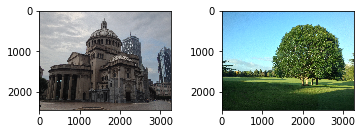

In [8]:
imgOne = mpimg.imread('image1.jpg')
imgTwo = mpimg.imread('image2.jpg')

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(imgOne)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(imgTwo)

#### B

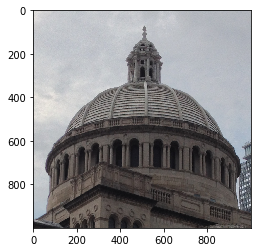

In [9]:
croppedImgOne = imgOne[100:1100,1100:2100,:]
plt.imshow(croppedImgOne)
Image.fromarray(croppedImgOne, 'RGB').save('image1_crop.jpg')

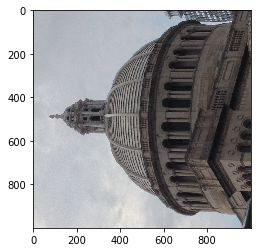

In [10]:
rotatedImgOne = np.rot90(croppedImgOne, 1)
plt.imshow(rotatedImgOne)
Image.fromarray(rotatedImgOne, 'RGB').save('image1_crop_rotated.jpg')

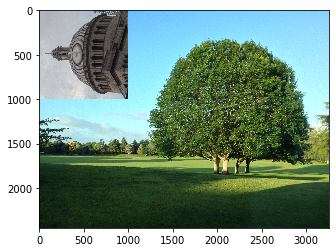

In [11]:
modImgTwo = np.array(Image.open('image2.jpg'))
modImgTwo[0:1000,0:1000,:] = rotatedImgOne
plt.imshow(modImgTwo)
Image.fromarray(modImgTwo, 'RGB').save('image2_pasted.jpg')

#### C

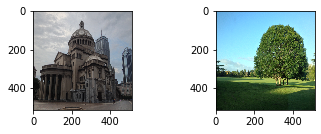

In [12]:
resizedImgOne = Image.open('image1.jpg')
resizedImgOne = resizedImgOne.resize([512,512],Image.ANTIALIAS)
resizedImgTwo = Image.open('image2.jpg')
resizedImgTwo = resizedImgTwo.resize([512,512],Image.ANTIALIAS)
fig2 = plt.figure()
ax3 = fig2.add_subplot(2,2,1)
ax3.imshow(resizedImgOne)
ax4 = fig2.add_subplot(2,2,2)
ax4.imshow(resizedImgTwo)

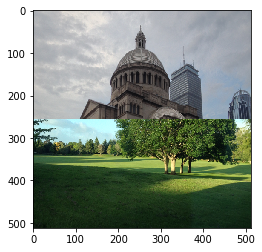

In [13]:
twoNOne = np.array(resizedImgOne)
twoNOne[256:512,0:512] = np.array(resizedImgTwo)[256:512,0:512]
plt.imshow(twoNOne)
Image.fromarray(twoNOne, 'RGB').save('image12_composited.jpg')

### 5

#### A

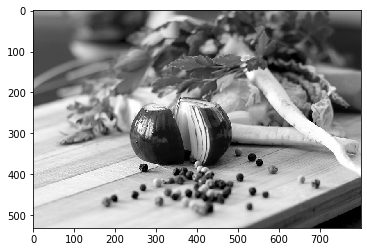

In [14]:
greyscaleImg = mpimg.imread('svd_test.jpg')
greyscaleImg = np.dot(greyscaleImg[:,:,:3],[0.2989, 0.5870, 0.1140])
plt.imshow(greyscaleImg, cmap=plt.get_cmap('gray'))

# Another way to do it, possibly easier
# fname = 'svd_test.jpg'
# image = Image.open(fname).convert("L")
# arr = np.asarray(image)
# plt.imshow(arr, cmap='gray', vmin=0, vmax=255)


#### B

In [15]:
u,s,vh = lin.svd(greyscaleImg)
print("The rank of the SVD is",s.size)

The rank of the SVD is 531


#### C

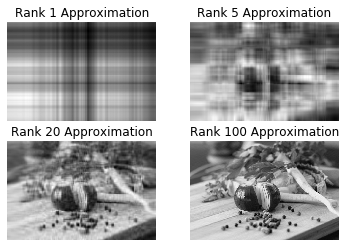

In [49]:
fig3 = plt.figure()
rank1Approx = u[:, :1] @ np.diag(s[:1]) @ vh[:1, :]
rank5Approx = u[:, :5] @ np.diag(s[:5]) @ vh[:5, :]
rank20Approx = u[:, :20] @ np.diag(s[:20]) @ vh[:20, :]
rank100Approx = u[:, :100] @ np.diag(s[:100]) @ vh[:100, :]

fig3.add_subplot(2,2,1), plt.imshow(rank1Approx, cmap="gray"), plt.axis('off'), plt.title("Rank 1 Approximation")
fig3.add_subplot(2,2,2), plt.imshow(rank5Approx, cmap="gray"), plt.axis('off'), plt.title("Rank 5 Approximation")
fig3.add_subplot(2,2,3), plt.imshow(rank20Approx, cmap="gray"), plt.axis('off'), plt.title("Rank 20 Approximation")
fig3.add_subplot(2,2,4), plt.imshow(rank100Approx, cmap="gray"), plt.axis('off'), plt.title("Rank 100 Approximation")

Image.fromarray(rank1Approx).convert('L').save('rank_1_approx.jpg')
Image.fromarray(rank5Approx).convert('L').save('rank_5_approx.jpg')
Image.fromarray(rank20Approx).convert('L').save('rank_20_approx.jpg')
Image.fromarray(rank100Approx).convert('L').save('rank_100_approx.jpg')